In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
import os
os.getcwd()
os.chdir("/home/jahn42/Desktop")
os.getcwd()

'/home/jahn42/Desktop'

In [26]:
scores = pd.read_csv("jahn_quiz_scores.csv")
scores.head()

,Name,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Quiz 6,Quiz 1 Total,Quiz 2 Total,Quiz 3 Total,Quiz 4 Total,Quiz 5 Total,Quiz 6 Total,Total Points,Total Possible Points,In Berkeley
0,Rowan Messier,2.0,2.0,4.0,6.0,6.0,3.0,3,4,5,6,8,6,23,32,1
1,Apolonia,1.0,3.0,2.0,2.0,1.0,3.0,3,4,5,6,8,6,12,32,1
2,Robert Ramirez,0.0,3.0,5.0,6.0,7.0,4.0,3,4,5,6,8,6,25,32,1
3,Daniel Ayala,NaN,NaN,4.0,NaN,5.0,NaN,3,4,5,6,8,6,9,32,1
4,Joshua Gershon,2.0,NaN,5.0,4.0,3.0,2.0,3,4,5,6,8,6,16,32,1


In [19]:
def clean(data, quiz_number):
    quiz_number = str(quiz_number)
    quiz = data[["Name", "Quiz "+ quiz_number, "Quiz "+ quiz_number + " Total", "In Berkeley"]]
    quiz = quiz.dropna(subset=["Quiz " + quiz_number])
    quiz["Total Percentage"] = quiz["Quiz " + quiz_number]/quiz["Quiz " + quiz_number+" Total"]*100
    quiz["Quiz " + quiz_number] = quiz["Quiz " + quiz_number].astype(int)


    return quiz

def describe_specific(data, quiz_number, berkeley):
        
    quiz_number = str(quiz_number)

    

    results = data[data["In Berkeley"] == berkeley]
    results = results[["Quiz " + quiz_number]].describe()
    results.loc["median"] = np.median(data["Quiz " + quiz_number])
    results = results.transpose().drop(columns = ["count"])
    return results
    
def describe(data, quiz_number):
    quiz_number = str(quiz_number)
    results = data
    results = results[["Quiz " + quiz_number]].describe()
    results.loc["median"] = np.median(data["Quiz " + quiz_number])
    results = results.transpose().drop(columns = ["count"])
    return results


def plot_hist(data, quiz_number, type):
    quiz_number = str(quiz_number)

    if type == True:
            ax = sns.histplot(data = data, x="Quiz " + quiz_number, binrange=[0,data["Quiz " + quiz_number +" Total"][0]+1], binwidth=1, kde=True, hue = "In Berkeley", element = "step" )

    else:
            ax = sns.histplot(data = data, x="Quiz " + quiz_number, binrange=[0,data["Quiz " + quiz_number +" Total"][0]+1], binwidth=1, kde=True)

        

    ax.set_xticks(range(data["Quiz " + quiz_number +" Total"][0]+1))  # Set the positions of the ticks
    ax.set_xticklabels(range(data["Quiz " + quiz_number +" Total"][0]+1))
    ax.set_yticks(range(0, int(ax.get_ylim()[1])+1, 1))  # Set the positions of the y-axis ticks with step 1
    plt.xlabel("Quiz " + quiz_number + " Scores")
    plt.title("Quiz " + quiz_number + " - Out of "+str(data["Quiz " + quiz_number +" Total"][0]));
    mean_value = scores["Quiz " + quiz_number].mean()
    std_value = scores["Quiz " + quiz_number].std()
    min_value = scores["Quiz " + quiz_number].min()
    max_value = scores["Quiz " + quiz_number].max()
    median_value = scores["Quiz " + quiz_number].median()
    ax.scatter(mean_value, 2, color='blue', label='Mean', zorder=5)

    plt.legend([f'σ: {std_value:.2f}', f'x̄: {mean_value:.2f}', f"Median: {median_value}", f'Max: {max_value}'], loc='upper left')

    #plt.savefig("quiz_" + quiz_number + ".pdf")





/home/jahn42/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


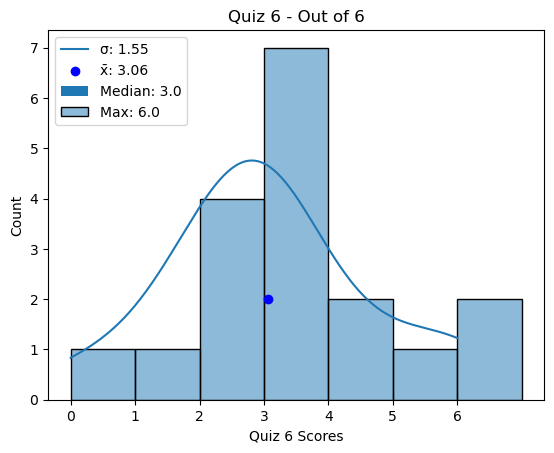

In [20]:
a = clean(scores,6)
plot_hist(a, 6, False)

In [6]:
describe(a, 6)

,mean,std,min,25%,50%,75%,max,median
Quiz 6,3.055556,1.551933,0.0,2.0,3.0,3.75,6.0,3.0


In [21]:
a

,Name,Quiz 6,Quiz 6 Total,In Berkeley,Total Percentage
0,Rowan Messier,3,6,1,50.000000
1,Apolonia,3,6,1,50.000000
2,Robert Ramirez,4,6,1,66.666667
4,Joshua Gershon,2,6,1,33.333333
5,Zack Sugerman,3,6,1,50.000000
6,Paophobic,6,6,1,100.000000
7,Rienzi Jamero,2,6,0,33.333333
10,coffeebwoy,1,6,0,16.666667
12,Richie Cayetano,0,6,0,0.000000
14,William Kacheoff,5,6,0,83.333333


In [22]:
scores = scores[["Name","Total Points", "Total Possible Points", "In Berkeley"]].sort_values(ascending = False, by = "Total Points").reset_index(drop=True)
scores.index = scores.index + 1
scores.head()

,Name,Total Points,Total Possible Points,In Berkeley
1,Maria Maldonado,26,32,0
2,Robert Ramirez,25,32,1
3,Rowan Messier,23,32,1
4,Aweamo,23,32,0
5,Rienzi Jamero,17,32,0


In [25]:
'''
ax = sns.histplot(data = scores, x=scores["Total Points"], kde = True,binwidth=0.99999)
ax.set_yticks(range(0, int(ax.get_ylim()[1])+1, 1))  
plt.xlabel("Points Accumulated")
plt.title("Total Scores for Quiz 1 to 3 | 12 Possible Points")


mean_value = scores["Total Points"].mean()
std_value = scores["Total Points"].std()
min_value = scores["Total Points"].min()
max_value = scores["Total Points"].max()
median_value = scores["Total Points"].median()

ax.scatter(mean_value, 2, color='blue', label='Mean', zorder=5)
plt.legend([f'σ: {std_value:.2f}', f'x̄: {mean_value:.2f}', f"Median: {5}", f'Max: {max_value}'], loc='upper right')

plt.savefig("scores.pdf")
'''


'\nax = sns.histplot(data = scores, x=scores["Total Points"], kde = True,binwidth=0.99999)\nax.set_yticks(range(0, int(ax.get_ylim()[1])+1, 1))  \nplt.xlabel("Points Accumulated")\nplt.title("Total Scores for Quiz 1 to 3 | 12 Possible Points")\n\n\nmean_value = scores["Total Points"].mean()\nstd_value = scores["Total Points"].std()\nmin_value = scores["Total Points"].min()\nmax_value = scores["Total Points"].max()\nmedian_value = scores["Total Points"].median()\n\nax.scatter(mean_value, 2, color=\'blue\', label=\'Mean\', zorder=5)\nplt.legend([f\'σ: {std_value:.2f}\', f\'x̄: {mean_value:.2f}\', f"Median: {5}", f\'Max: {max_value}\'], loc=\'upper right\')\n\nplt.savefig("scores.pdf")\n'